In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# read data from scalability test run
data = []

# pattern = r'Gazebo: \S. Negotiation rounds: (?P<rounds>\d+). Preparation time: (?P<prep_time>\d+\.\d+) seconds. Negotiation time: (?P<time>\d+\.\d+) seconds. Result: (?P<result>\S+). Goal: {"goal": "Scalability test! (?P<dispositions>\d+) dispositions, (?P<activated_cond>\d+) activated conditions, *?'
pattern = r'Negotiation rounds: (?P<rounds>\d+). Preparation time: (?P<prep_time>\d+\.\d+) seconds. Negotiation time: (?P<time>\d+\.\d+) seconds. Result: (?P<result>\S+). Goal: {"goal": "Scalability test! (?P<dispositions>\d+) dispositions, (?P<activated_cond>\d+) activated conditions, *?'

log_file_path = '../../../results/scalability_v1.log'
#  sim_files = [os.path.join('../results', f) for f in os.listdir('../results')]

# for log_file_path in sim_files:
with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
            prep_time = float(match.group("prep_time"))
            time = float(match.group("time"))
            dispositions = int(match.group("dispositions"))
            activated_conditions = int(match.group("activated_cond"))
            
            data.append({"rounds": rounds, "preparation_time": prep_time, "negotiation_time": time, "num_dispositions": dispositions, "percentage_activated_conditions": activated_conditions})
        else:
            print("Diverging result: ")
            print(line)
df = pd.DataFrame(data)
df.head()

,rounds,preparation_time,negotiation_time,num_dispositions,percentage_activated_conditions
0,3,1.015,0.015,25,10
1,1,1.004,0.008,25,10
2,3,1.015,0.012,25,10
3,1,1.003,0.009,25,10
4,1,1.004,0.010,25,10


In [6]:
# sum up negotiation and preparation time
df["total_time"] = df["preparation_time"] + df["negotiation_time"]
df.head()

,rounds,preparation_time,negotiation_time,num_dispositions,percentage_activated_conditions,total_time
0,3,1.015,0.015,25,10,1.030
1,1,1.004,0.008,25,10,1.012
2,3,1.015,0.012,25,10,1.027
3,1,1.003,0.009,25,10,1.012
4,1,1.004,0.010,25,10,1.014


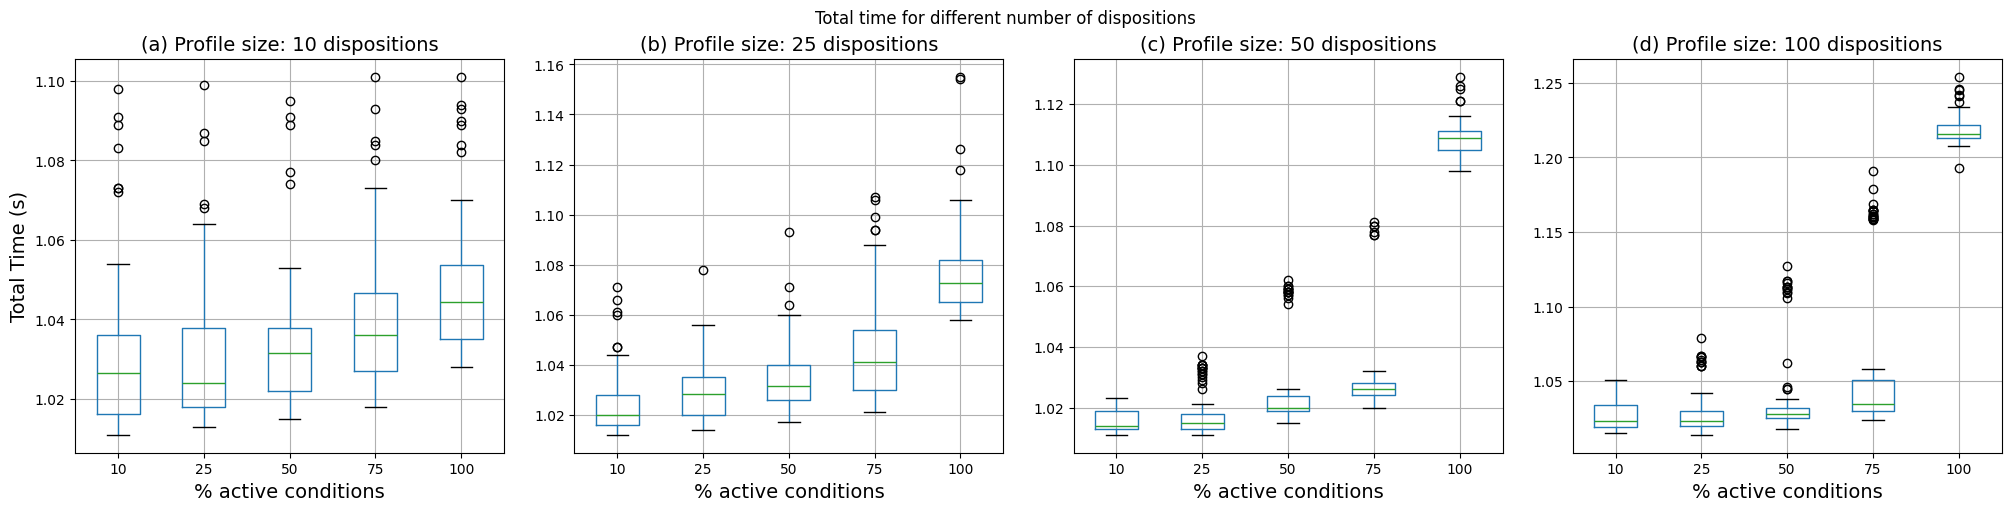

In [7]:
dispositions_list = df["num_dispositions"].unique()
conditions_list = df["percentage_activated_conditions"].unique()

num_dispositions = len(dispositions_list)
num_conditions = len(conditions_list)
fig, axes = plt.subplots(1,num_dispositions, figsize=(20, 5), constrained_layout=True)

# First row: dispositions
chart_counter = 0
for i, dispositions in enumerate(sorted(dispositions_list)):
    if num_dispositions > 1:
        ax = axes[i] if i < num_dispositions else None
    else : ax = axes
    if ax:
        subset = df[df["num_dispositions"] == dispositions][["percentage_activated_conditions","total_time"]]
        subset.boxplot(ax=ax,by="percentage_activated_conditions")
        ax.set_title(f"({['a', 'b', 'c', 'd', 'e'][chart_counter]}) Profile size: {dispositions} dispositions", fontsize=14)
        ax.set_xlabel("% active conditions", fontsize=14)
        if i == 0:
            ax.set_ylabel("Total Time (s)", fontsize=14)
        else:
            ax.set_ylabel(" ")
        chart_counter += 1
    else:
        pass
fig.suptitle("Total time for different number of dispositions")
plt.show()

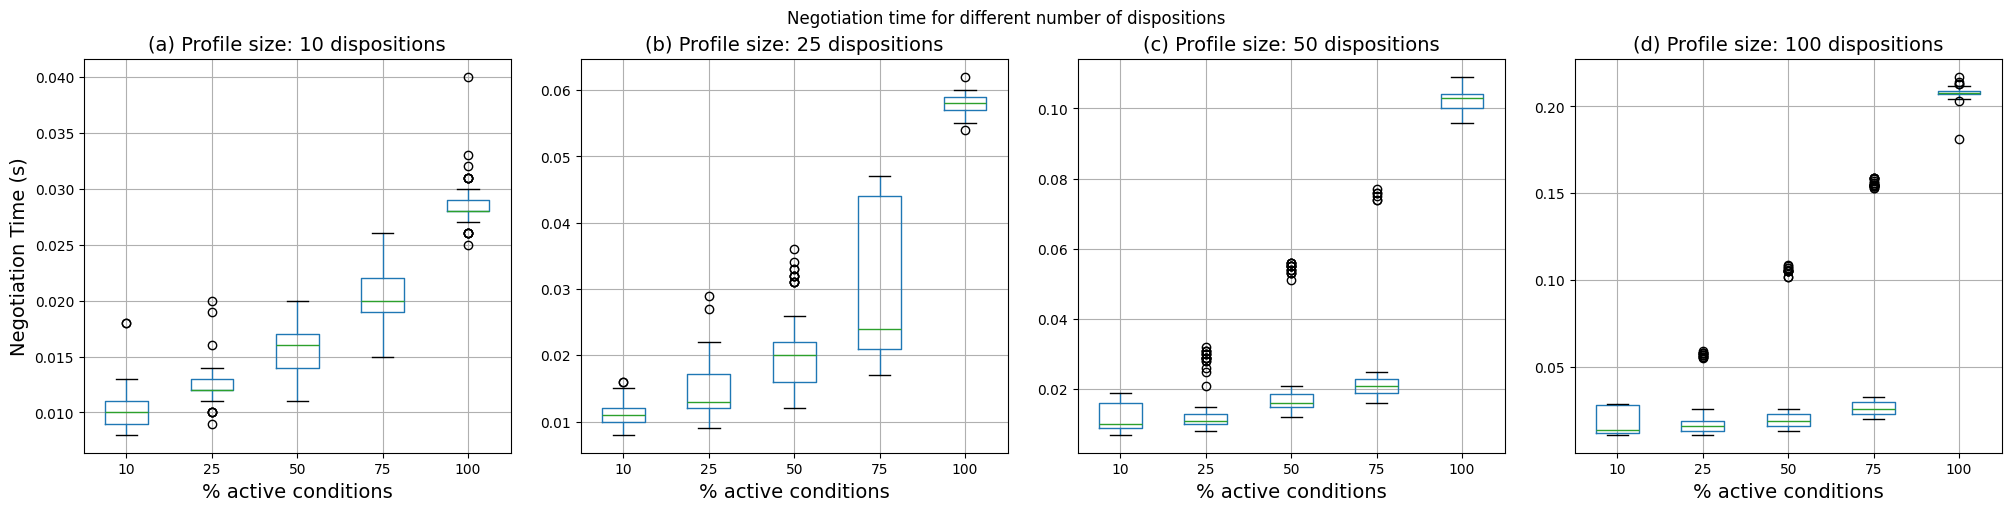

In [8]:
dispositions_list = df["num_dispositions"].unique()
conditions_list = df["percentage_activated_conditions"].unique()

num_dispositions = len(dispositions_list)
num_conditions = len(conditions_list)
fig, axes = plt.subplots(1,num_dispositions, figsize=(20, 5), constrained_layout=True)

# First row: dispositions
chart_counter = 0
for i, dispositions in enumerate(sorted(dispositions_list)):
    if num_dispositions > 1:
        ax = axes[i] if i < num_dispositions else None
    else : ax = axes
    if ax:
        subset = df[df["num_dispositions"] == dispositions][["percentage_activated_conditions","negotiation_time"]]
        subset.boxplot(ax=ax,by="percentage_activated_conditions")
        ax.set_title(f"({['a', 'b', 'c', 'd', 'e'][chart_counter]}) Profile size: {dispositions} dispositions", fontsize=14)
        ax.set_xlabel("% active conditions", fontsize=14)
        if i == 0:
            ax.set_ylabel("Negotiation Time (s)", fontsize=14)
        else:
            ax.set_ylabel(" ")
        chart_counter += 1
    else:
        pass
fig.suptitle("Negotiation time for different number of dispositions")
plt.show()

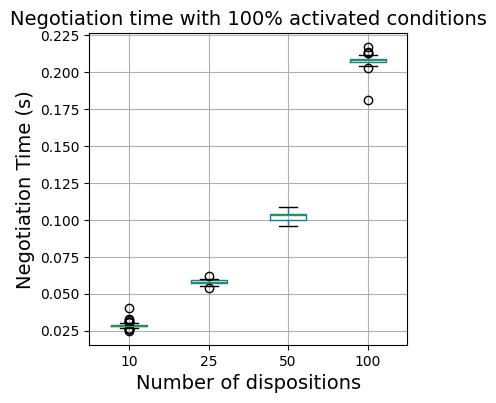

In [9]:
dispositions_list = df["num_dispositions"].unique()

num_dispositions = len(dispositions_list)
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)

subset = df[df["percentage_activated_conditions"] == 100][["num_dispositions","negotiation_time"]]
subset.boxplot(ax=ax,by="num_dispositions")
ax.set_title(f"Negotiation time with 100% activated conditions", fontsize=14)
ax.set_xlabel("Number of dispositions", fontsize=14)
ax.set_ylabel("Negotiation Time (s)", fontsize=14)
fig.suptitle("")
plt.show()

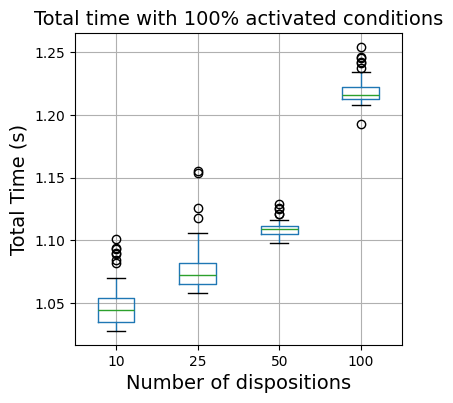

In [10]:
dispositions_list = df["num_dispositions"].unique()

num_dispositions = len(dispositions_list)
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)

subset = df[df["percentage_activated_conditions"] == 100][["num_dispositions","total_time"]]
subset.boxplot(ax=ax,by="num_dispositions")
ax.set_title(f"Total time with 100% activated conditions", fontsize=14)
ax.set_xlabel("Number of dispositions", fontsize=14)
ax.set_ylabel("Total Time (s)", fontsize=14)
fig.suptitle("")
plt.show()

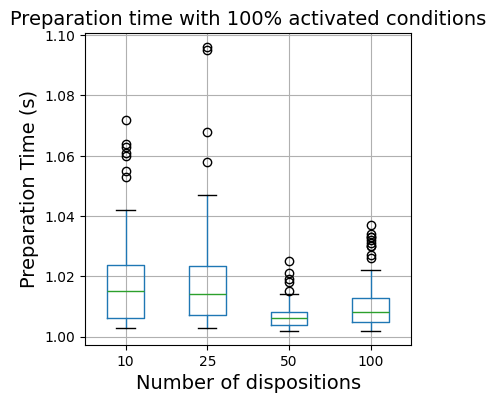

In [11]:
dispositions_list = df["num_dispositions"].unique()

num_dispositions = len(dispositions_list)
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)

subset = df[df["percentage_activated_conditions"] == 100][["num_dispositions","preparation_time"]]
subset.boxplot(ax=ax,by="num_dispositions")
ax.set_title(f"Preparation time with 100% activated conditions", fontsize=14)
ax.set_xlabel("Number of dispositions", fontsize=14)
ax.set_ylabel("Preparation Time (s)", fontsize=14)
fig.suptitle("")
plt.show()